In [19]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%reload_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt

from contrib.handcrafted_data import syn_dataset
from vectran.data.graphics_primitives import PrimitiveType
from vectran.renderers.cairo import render_with_skeleton

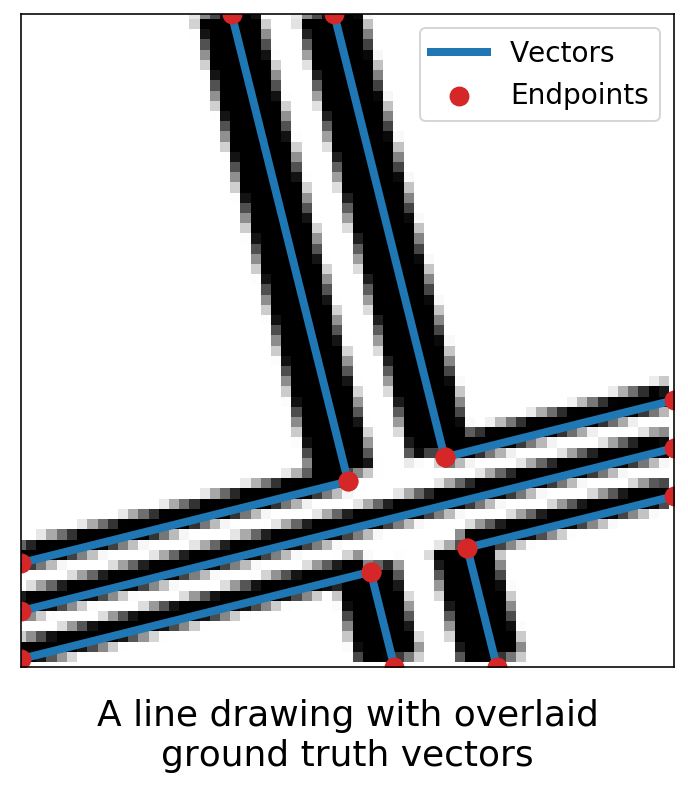

In [98]:
np.random.seed(4)

sample = syn_dataset[0]

plt.figure(figsize=(6, 6))
plt.xlim(0, 64)
plt.ylim(64, 0)
plt.xticks([])
plt.yticks([])
plt.title('A line drawing with overlaid\nground truth vectors', size=18, y=-0.17)
plt.imshow(sample['raster'], cmap='gray')
for i, line in enumerate(sample['vector'][PrimitiveType.PT_LINE]):
    x1, y1, x2, y2, width, confidence = line
    if confidence > 0.5:
        if i == 0:
            plt.plot([x1, x2], [y1, y2], color='C0', linewidth=4, zorder=1, label='Vectors')
            plt.scatter([x1, x2], [y1, y2], color='C3', zorder=2, s=80, label='Endpoints')
        else:
            plt.plot([x1, x2], [y1, y2], color='C0', linewidth=4, zorder=1)
            plt.scatter([x1, x2], [y1, y2], color='C3', zorder=2, s=80)
plt.legend(prop={'size': 14})
plt.savefig('assets/raster_vectors.png', dpi=300, transparent=True)
plt.show()

In [81]:
from utils import (
    SyntheticPatch, LinePerturbationPipe, LineRandomShift, torch_to_synthetic_lines
)

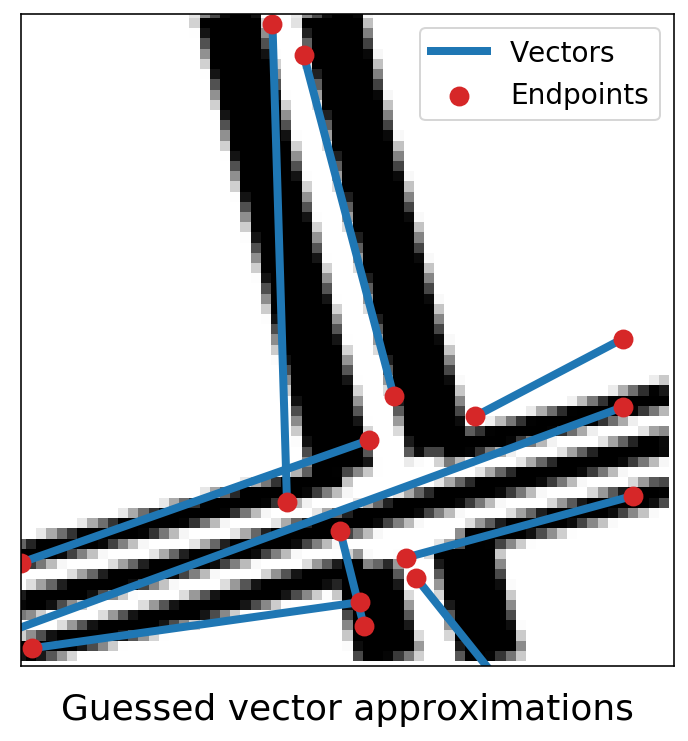

In [94]:
np.random.seed(4)

perturber = LinePerturbationPipe(LineRandomShift((-6, 6), (0, 1)))

sample = syn_dataset[0]

plt.figure(figsize=(6, 6))
plt.xlim(0, 64)
plt.ylim(64, 0)
plt.xticks([])
plt.yticks([])
plt.title('Guessed vector approximations', size=18, y=-0.1)
plt.imshow(sample['raster'], cmap='gray')
sample['vector'][PrimitiveType.PT_LINE] = np.array(perturber.transform(sample['vector'][PrimitiveType.PT_LINE]))
for i, line in enumerate(sample['vector'][PrimitiveType.PT_LINE]):
    x1, y1, x2, y2, width, confidence = line
    if confidence > 0.5:
        if i == 0:
            plt.plot([x1, x2], [y1, y2], color='C0', linewidth=4, zorder=1, label='Vectors')
            plt.scatter([x1, x2], [y1, y2], color='C3', zorder=2, s=80, label='Endpoints')
        else:
            plt.plot([x1, x2], [y1, y2], color='C0', linewidth=4, zorder=1)
            plt.scatter([x1, x2], [y1, y2], color='C3', zorder=2, s=80)
plt.legend(prop={'size': 14})
plt.savefig('assets/raster_vectors_perturbed.png', dpi=300, transparent=True)
plt.show()

In [84]:
perturber.transform(sample['vector'][PrimitiveType.PT_LINE])

[[0.9999999999999929,
  62.232608842421406,
  33.26714796043467,
  57.68884927831445,
  2.5178941743006638,
  1.0],
 [0.0,
  53.81746644358102,
  34.05707715251702,
  41.82473942015419,
  2.5178941743006638,
  1.0],
 [-1.0, 60.525037643001205, 59.0, 38.56804546103764, 2.5178941743006638, 1.0],
 [24.631686392080795,
  1.0,
  26.057077152517017,
  47.82473942015419,
  6.1779594135953335,
  1.0],
 [27.689898281619033,
  4.0,
  36.52662008545256,
  37.46371719284761,
  6.1779594135953335,
  1.0],
 [31.26714796043467,
  50.68884927831445,
  33.588678574044366,
  60.0,
  6.1779594135953335,
  1.0],
 [44.52662008545256,
  39.46371719284761,
  59.0,
  31.86047426161744,
  2.5178941743006638,
  1.0],
 [38.736690893370195,
  55.32782705100789,
  49.646890463582594,
  69.0,
  6.1779594135953335,
  1.0],
 [37.736690893370195,
  53.32782705100789,
  60.0,
  47.275616660457835,
  2.5178941743006638,
  1.0],
 [-3.0, 5.0, 1.0, 2.0, 1, 0.0]]

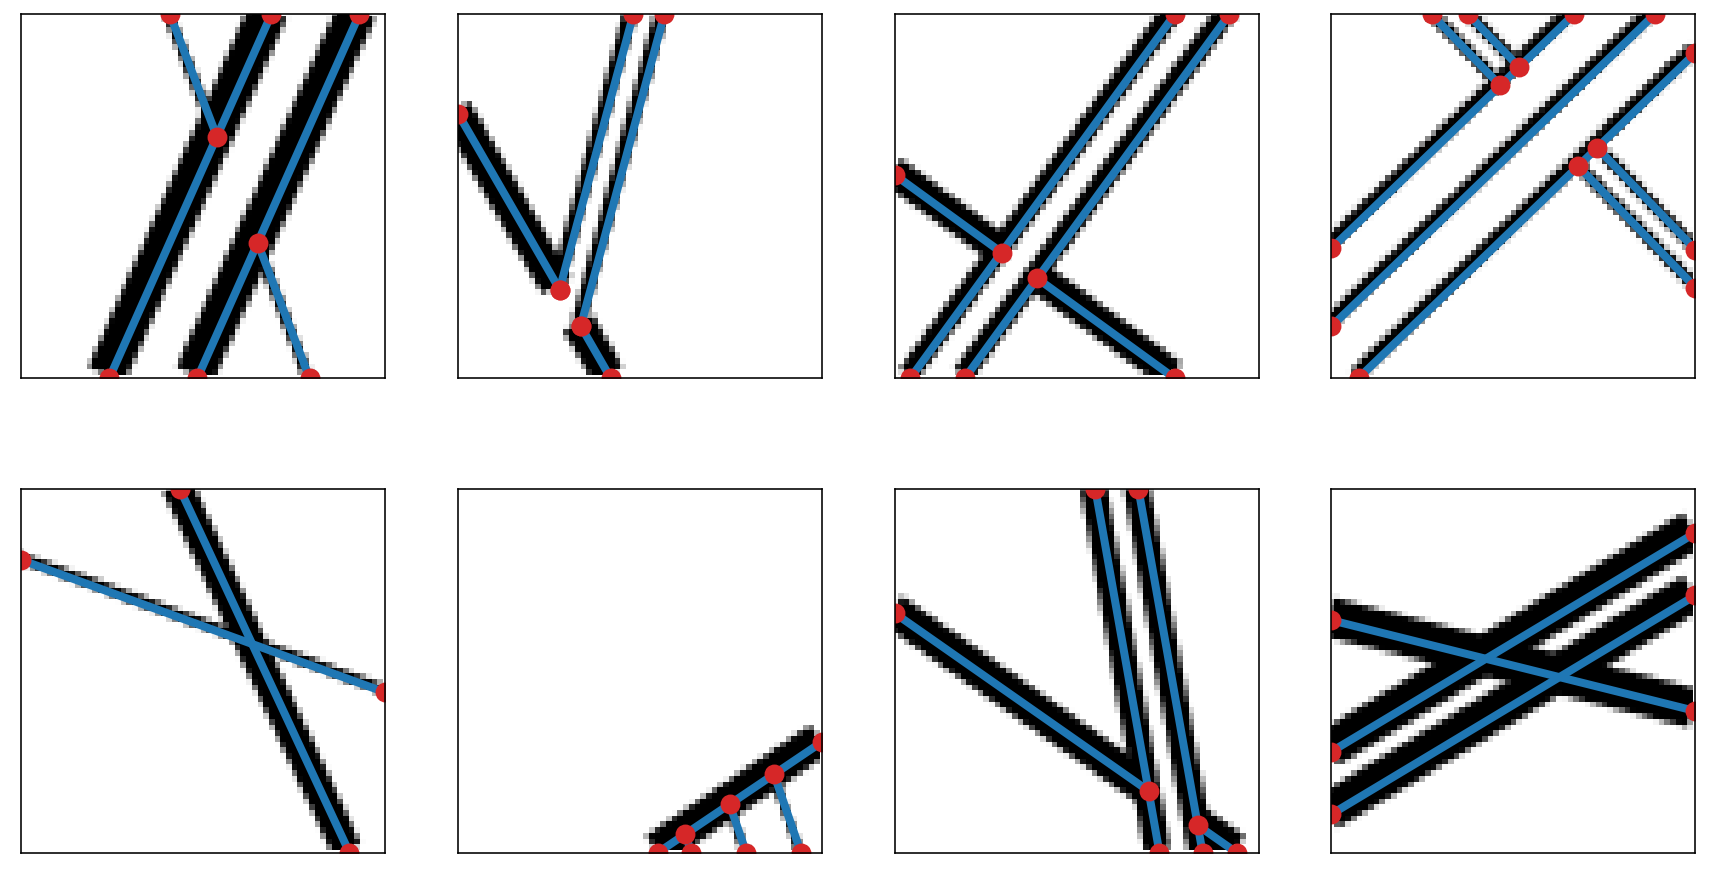

In [105]:
np.random.seed(45)

plt.figure(figsize=(15, 8))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    sample = syn_dataset[i]

    
    plt.xlim(0, 64)
    plt.ylim(64, 0)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(sample['raster'], cmap='gray')
    for i, line in enumerate(sample['vector'][PrimitiveType.PT_LINE]):
        x1, y1, x2, y2, width, confidence = line
        if confidence > 0.5:
            if i == 0:
                plt.plot([x1, x2], [y1, y2], color='C0', linewidth=4, zorder=1, label='Vectors')
                plt.scatter([x1, x2], [y1, y2], color='C3', zorder=2, s=80, label='Endpoints')
            else:
                plt.plot([x1, x2], [y1, y2], color='C0', linewidth=4, zorder=1)
                plt.scatter([x1, x2], [y1, y2], color='C3', zorder=2, s=80)
#     plt.legend(prop={'size': 14})
    
plt.savefig('assets/synthetic_patches.png', dpi=300, transparent=True)
plt.show()

In [193]:
np.random.seed(42)

sample = syn_dataset[0]
for row in sample['vector'][PrimitiveType.PT_LINE]:
    print(row)

[ 0.          9.62128723 53.63428671 43.13570921  4.60669007  1.        ]
[43.67562355 -0.         58.45118778 64.          5.99465584  1.        ]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]


In [194]:
import torch

from crossing_refiner import CrossingRefinerFull

DEVICE = 'cuda:3'

model = CrossingRefinerFull().to(DEVICE)
model.load_state_dict(torch.load('best_crossings_mult.pt'))
_ = model.train(False)

In [195]:
batch = torch.from_numpy(1. - sample['raster']).unsqueeze(0).unsqueeze(0).to(DEVICE)

In [202]:
addition = model.forward(batch)[0][0].detach().cpu().numpy() * (batch[0][0].detach().cpu().numpy() > 0)
thresholded = addition * (addition > 0.75)

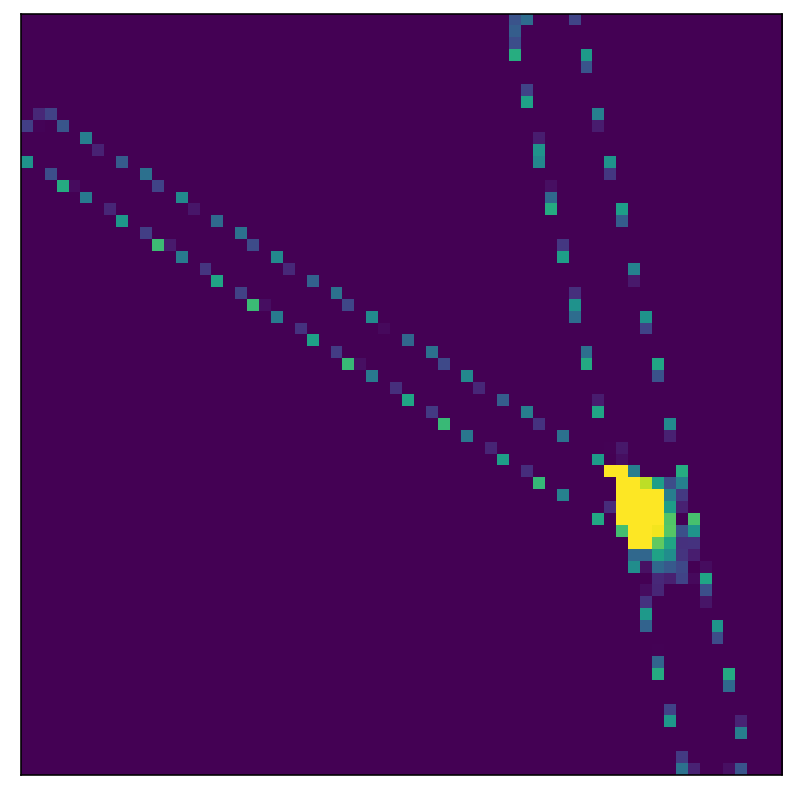

In [221]:
plt.figure(figsize=(7, 7))
plt.xticks([])
plt.yticks([])
plt.imshow(addition, vmin=0., vmax=1.)
plt.savefig('assets/addition_full.png', dpi=300)
plt.show()

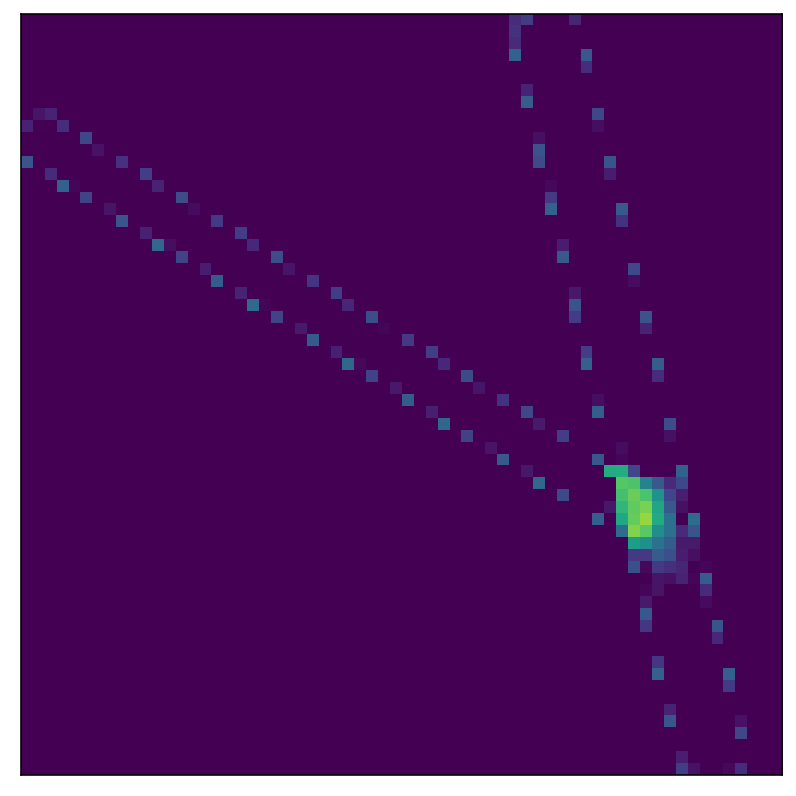

In [222]:
plt.figure(figsize=(7, 7))
plt.xticks([])
plt.yticks([])
plt.imshow(addition * 0.5, vmin=0., vmax=1.)
plt.savefig('assets/addition_half.png', dpi=300)
plt.show()

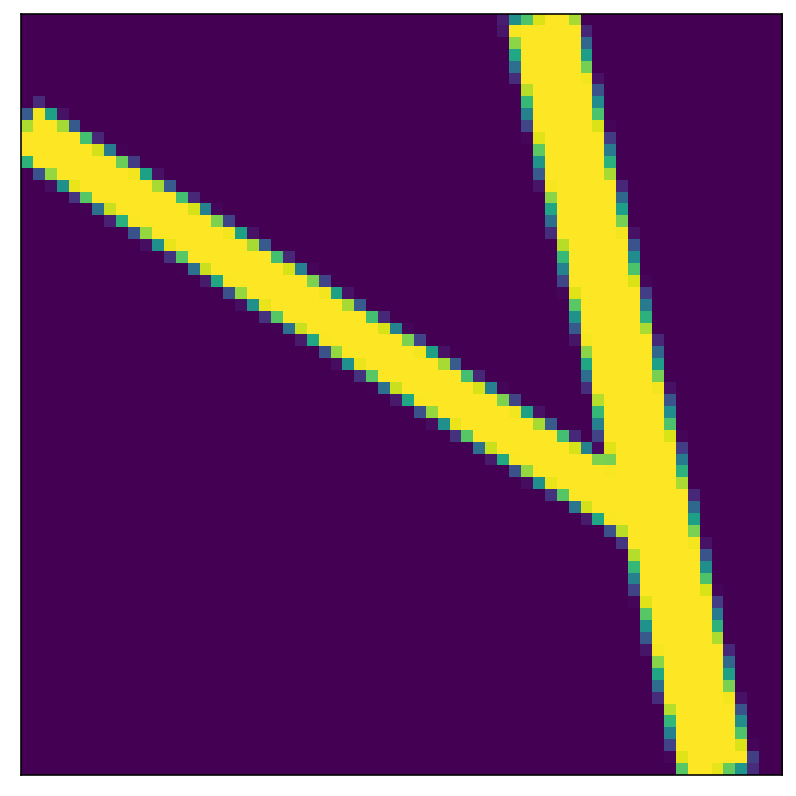

In [223]:
plt.figure(figsize=(7, 7))
plt.xticks([])
plt.yticks([])
plt.imshow(1. - sample['raster'], vmin=0., vmax=1.)
plt.savefig('assets/raster_full.png', dpi=300)
plt.show()

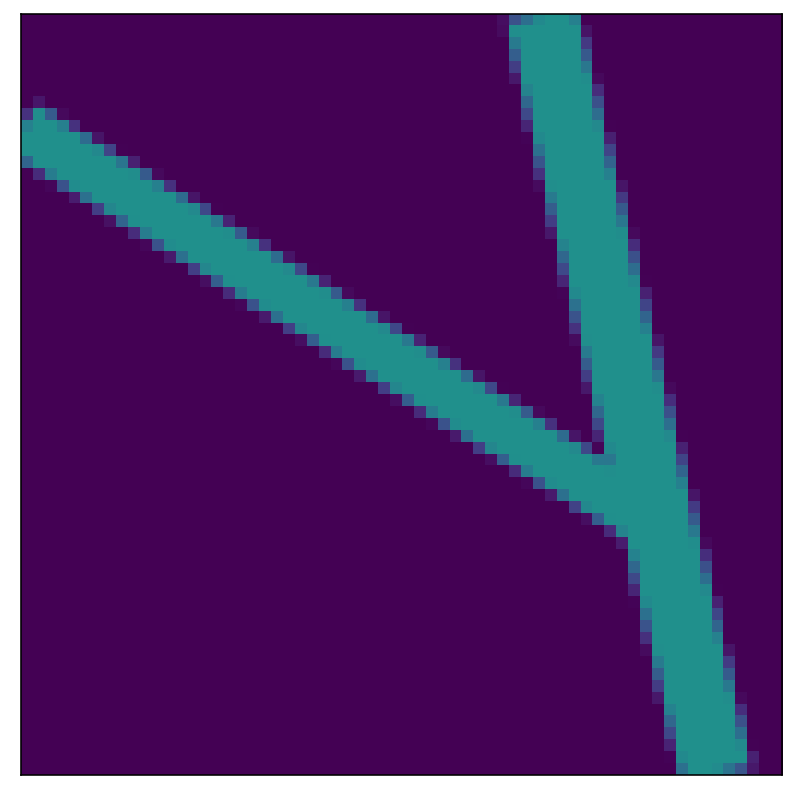

In [224]:
plt.figure(figsize=(7, 7))
plt.xticks([])
plt.yticks([])
plt.imshow((1. - sample['raster']) * 0.5, vmin=0., vmax=1.)
plt.savefig('assets/raster_half.png', dpi=300)
plt.show()

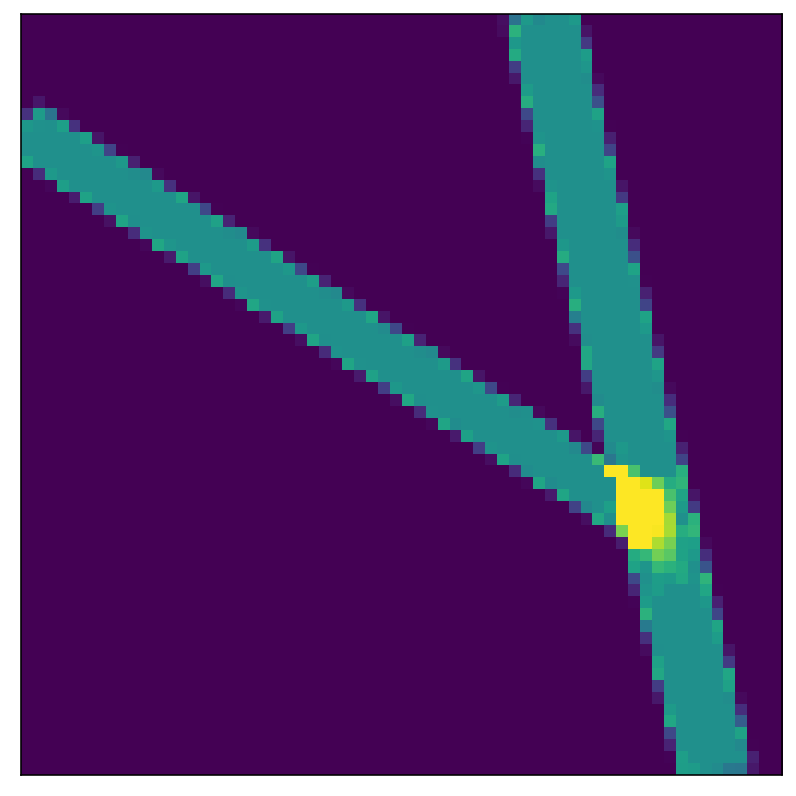

In [225]:
plt.figure(figsize=(7, 7))
plt.xticks([])
plt.yticks([])
plt.imshow((1. - sample['raster']) * 0.5 + addition * 0.5, vmin=0., vmax=1.)
plt.savefig('assets/crossing_raster.png', dpi=300)
plt.show()